# **APLICACIONES DE CIENCIAS DE LA COMPUTACIÓN (INF265)**<br>
## **(2023-2)**

# **Laboratorio 8: Regresion Lineal, Regresion KNN, Árboles de regresión, SVR.**

**Indicaciones generales:**

- Duración: **120 minutos (2 horas)**.
- Cualquier indicio de plagio resultará en la anulación de la prueba.
- Subir el cuadernillo con el nombre **Lab8_código.ipynb**, donde código es su código PUCP de 8 dígitos.  
- Se tomará en cuenta en la calificación el uso adecuado de comentarios, sintaxis. Recuerde que para obtener el puntaje completo en la pregunta, debe respetar las restricciones que se dan en donde se mencione.


## DATASET

- El dataset insurance.csv contiene informacion de pacientes de una aseguradora y el costo para tratamientos medicos (**charges**). El objetivo es  predecir este costo  (**charges**) mediante el desarrollo de un modelo de regresión usando las otras variables como entradas
- Las variables categoricas deben ser transformadas a numéricas. Para codificar y transformar una variable categorica a numerica, pueden usar el siguiente codigo:
```
le = LabelEncoder()
le.fit(df.categorical_var.drop_duplicates())
df.categorical_var = le.transform(df.categorical_var)
```

# Pregunta 1: EDA (3 ptos)
Dado el dataset, realizar un correcto EDA, indicando (no limitado a):
* la distribucion de los datos
* deteccion y tratamiendo de nulos
* deteccion de outliers.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings

In [2]:
df_base = pd.read_csv('insurance.csv')
df_base.sample()

,age,sex,bmi,children,smoker,region,charges
1274,26,male,27.06,0,yes,southeast,17043.3414


In [5]:
# observe sI hay nulos Y corrija si es necesario
# COMPLETAR
df_base.isnull()

#No existe nulos en los datos

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [12]:
# Convierta variables categoricas a numericas  (sex, smoker, region)
from sklearn.preprocessing import LabelEncoder

# COMPLETAR
label_encoder=LabelEncoder()
df_base['sex']=label_encoder.fit_transform(df_base['sex'])
df_base['smoker']=label_encoder.fit_transform(df_base['smoker'])
df_base['region']=label_encoder.fit_transform(df_base['region'])

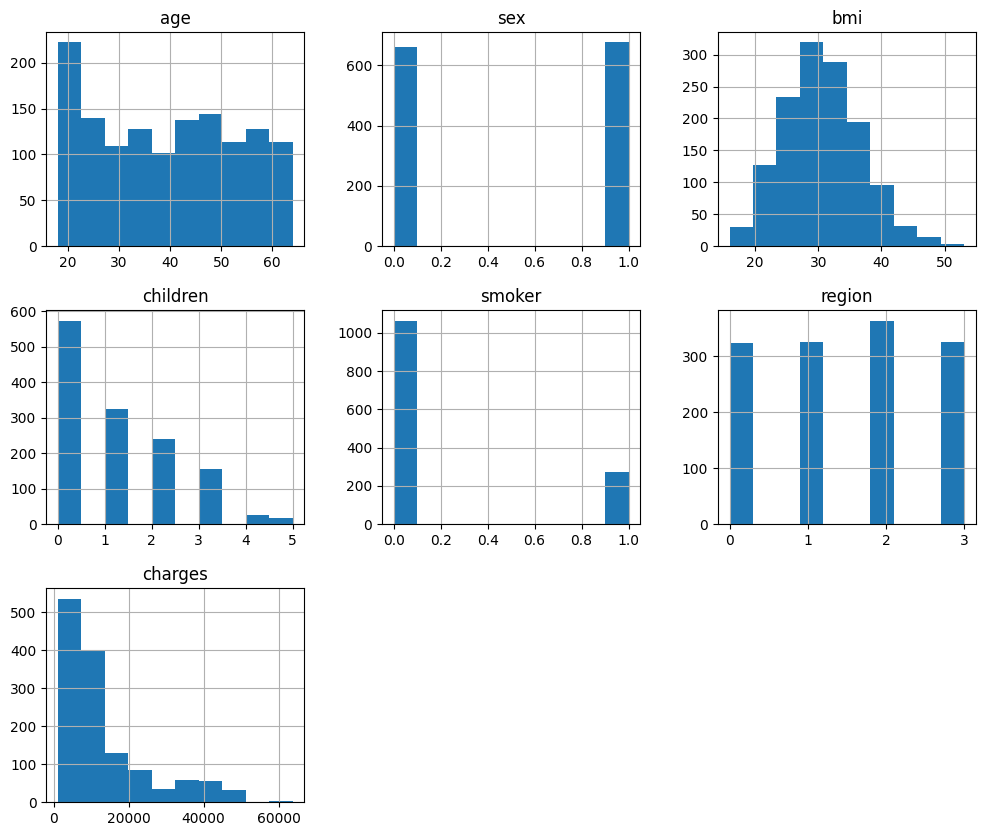

In [20]:
import matplotlib.pyplot as plt
df_base.hist(figsize=[12,10])
plt.show()

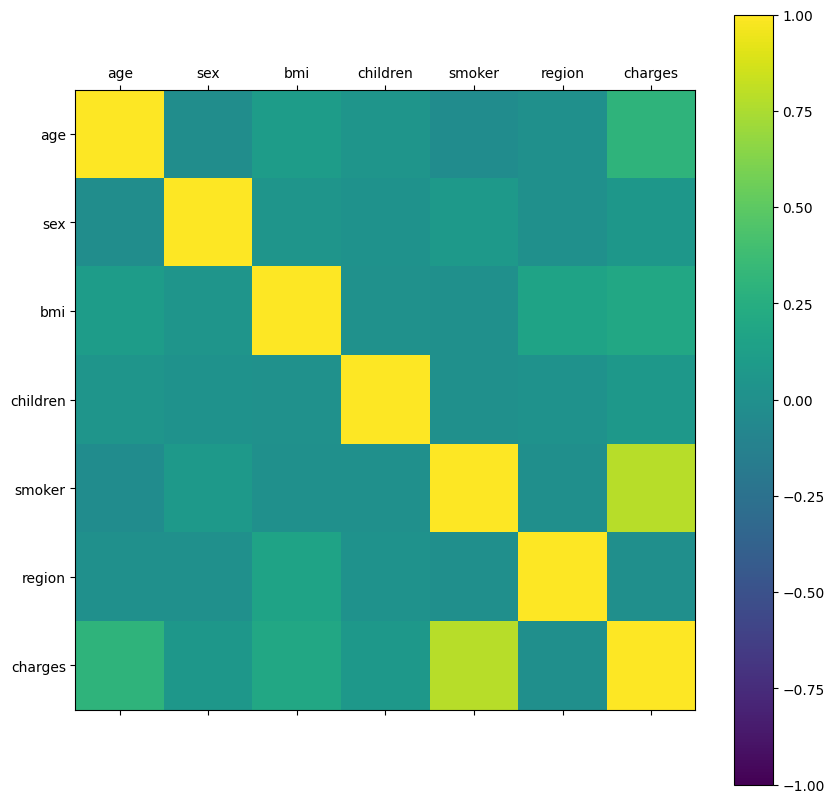

In [24]:
# Genere un mapa de LA MATRIZ  DE CORRELACIONES ENTRE LAS VARIABLES

# COMPLETAR
import matplotlib.pyplot as plt
names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
correlations = df_base.corr()
fig = plt.figure( figsize=[10,10])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,7,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

**DAR UNA INTERPRETACION DE LA MATRIZ DE CORRELACIONES**

La matriz de correlación nos muestra como los valores se correlacionan entre sí, miden el grado de relación lineal entre cada par de variables. Nos damos cuenta que los valores son en su mayoría positivos lo que indica que si una variable aumenta usualmente otra variable tambien debe aumentar, osea que son directamente proporcionales. Existe las variables charges y smoker que estan bien relacionadas entre sí.

# Pregunta 2: Separar train test + seleccion de 5 algoritmos para entrenar (2 ptos)

Segun lo visto en clase, realize el split de la data en train y test, luego prepare la lista de algoritmos a usar, para su posterior entrenamiento

In [33]:
from sklearn.model_selection import train_test_split
#importar lo necesario
from sklearn.linear_model import  LinearRegression  # para modelos de regresion lineal
from sklearn.linear_model import Ridge   # Ridge regression
from sklearn.linear_model import Lasso   # Lasso regression
from sklearn.linear_model import ElasticNet  # ElasticNet regression
from sklearn.neighbors import KNeighborsRegressor  # Knn regression
from sklearn.tree import DecisionTreeRegressor   # Decision Trees regression
from sklearn.svm import SVR  # Support Vector regression

#completar
array= df_base.values
x = array[:,0:6]
y = array[:,6]

test_size= 0.20
seed= 7

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
print('Training: %d ejemplos. Validation: %d ejemplos' % (len(y_train), len(y_test)))
# Definimos el pool de algoritmos de ML a evaluar
algos = []
algos.append(('LinearReg', LinearRegression( )))
algos.append(('Ridge', Ridge( )))
algos.append(('Lasso', Lasso()))
algos.append(('ElasticNet', ElasticNet()))
algos.append(('KNN', KNeighborsRegressor( n_neighbors=5 ) ))
algos.append(('RegTrees', DecisionTreeRegressor(   )))

Training: 1070 ejemplos. Validation: 268 ejemplos


# Pregunta 3: Evalue algoritmos y visualizace resultados (5 ptos)

Evalue los algoritmos escogidos en la lista de algoritmos usando cross validation de 10 folds en la data de train y finalmente grafique un boxplot de la metrica evaluada (**neg_mean_squared_error**) de los algoritmos en cuestion

In [34]:
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion
# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold( n_splits=10, random_state=seed, shuffle= True)

#  evalua cada algoritmo


for algoname, algo in algos:
   #complete
    cv_results = cross_val_score(algo, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')  #r2 neg_mean_squared_error
    results.append(cv_results)
    names.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

LinearReg: -36706708.409476556 (7234403.639164129)
Ridge: -36711252.56773891 (7216037.737339257)
Lasso: -36705759.97392058 (7233028.373198205)
ElasticNet: -88608278.9217059 (14152243.081272123)
KNN: -138357433.7758283 (23679161.052482344)
RegTrees: -44447106.16613611 (14695133.493221141)


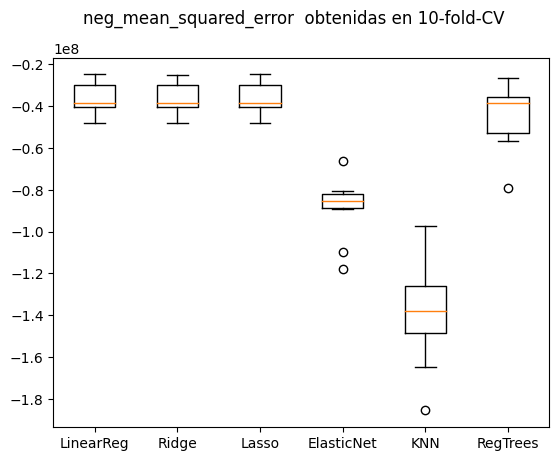

In [35]:
import matplotlib.pyplot as plt
# Muestra graficamente los resultados de neg_mean_absolute_error  en crossvalidacion de los Algoritmos evaluados en bloxplot
fig = plt.figure()
fig.suptitle('neg_mean_squared_error  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Pregunta 4: Escoja el mejor algoritmo y evalue resultados en conjunto de validacion(5 ptos)
Escoja el  algoritmo que tenga el mejor promedio de la metrica  en crosvalidacion. Entrene un modelo final con toda la data de train con el algoritmo elegido. Muestre las metricas obteneidas en el conjunto de validacion (Mean squared error:, Mean absolute error, Explained variance, R2 score. Muestre un scatter plot comparando  los valores reales vs predichos de forma grafica.  Comente los resultados

In [42]:
# Codigo para escoger el algoritmo que tenga el mejor promedio de la metrica en crosvalidacion.
import numpy as np
ind = 0
best_metric = -999999999
best_ind = 0
for result in results:
    current_metric = np.mean(results[ind])
    if current_metric > best_metric :
        #complete la logica
        best_ind= ind
        best_metric=current_metric
    ind += 1
print('algoritmo con mejor promedio de la metrica: ', names[best_ind])
print('mejor metrica promedio: ', best_metric)


algoritmo con mejor promedio de la metrica:  Lasso
mejor metrica promedio:  -36705759.97392058


In [43]:
# Entrena un modelo final con toda la data de train con el algoritmo elegido

from sklearn.metrics import mean_squared_error, mean_absolute_error   # para manejar metricas de desempeño
from sklearn.metrics import explained_variance_score  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import r2_score  # para manejar matrices de confusion
# Reentrena modelo de regresion Ridge con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model = Lasso()
model.fit(x_train, y_train)

# predice el target en el conjunto de validacion
y_predicted = model.predict(x_test)

# muestra metricas de las predicciones en el conjunto de validacion
print("Mean squared error:", mean_squared_error(y_test, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_test, y_predicted))
print("Explained variance score:", explained_variance_score(y_test, y_predicted))
print("R2 score:", r2_score(y_test, y_predicted))



Mean squared error: 37679463.31126076
Mean absolute error: 4285.2254778643755
Explained variance score: 0.765220273631424
R2 score: 0.764479478036353


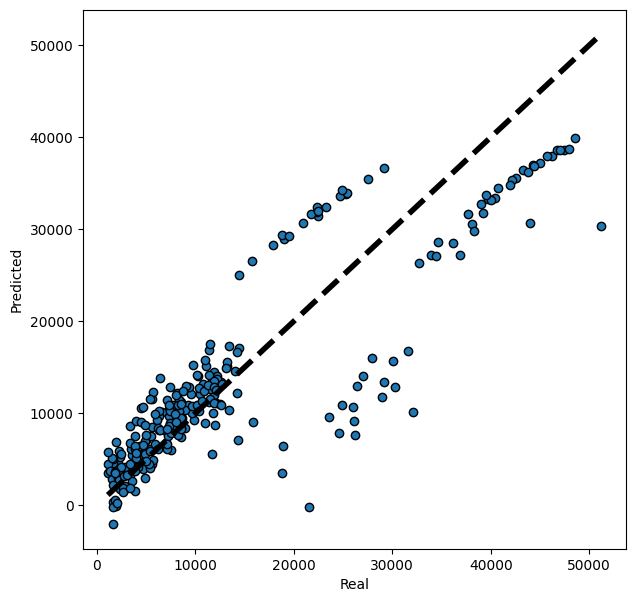

In [44]:
#muestre un scatter plot de los valores reales vs predichos
fig, ax = plt.subplots( figsize=[7,7])

#COMPLETAR
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

**COMENTE SUS RESULTADOS**

Podemos notar que el modelo que nos beneficia más es el Lasso, ya que a comparación de los otros modelos este predice valores mucho más cercanos a los reales y además tiene las mejores metricas. Por ello se eligió este modelo

## Pregunta 5: Evalue Pipelines (5 pts)

En esta parte usted va evaluar técnicas de pre-procesamiento en conjunto con  modelos de machine learning. A estas combinaciones (pre-procesamiento+modelo) se le llama **pipeline**

Un pipeline debe ser evaluado como si fuese un unico modeloo, por ejemplo con la estrategia de crosvalidacion. No se debe hacer el pre-procesamiento primero de  todo el conjunto de datos disponible y luego recien aplicar la estrategia de crosvalidacion para evaluar modelos, ya que  se incurriria en 'information leakage' y las metricas de evaluacion seran muy optimistas de lo que realmente deben ser.  En Sklearn se puede implementar <b> pipelines </b> para evaluar en crosvalidacion todo el conjunto de pasos de pre procesamiento y modelamiento.

Para los pipelines a evaluar, escoja el paso de procesamiento que considere adecuado (MinMaxScaler, StandardScaler, PCA(n_components=x), (StandardScaler() + PCA(n_components=x)), etc.) junto con los algoritmos de regresion escogidos en la Pregunta 2. Evaluelos en crossvalidacion (10 folds). Escoja el pipeline que muestre el mejor promedio de la metrica neg_mean_squared_error  y reentrenelo con toda la data de train. Finalmente prediga el conjunto de validacion y muestre las mismas metricas y scatter plot de la pregunta anterior

Al final, comprare los resultados con respecto a no usar pre-procesamiento

In [45]:
# Funciones de preprocesamiento
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [83]:
# Definimos el pool de pipleines de ML (preprocesamiento + algoritmo de ML) a evaluar
pipelines = []
pipelines.append(('pipLinearReg', make_pipeline(StandardScaler(), LinearRegression())))
pipelines.append(('pipRidge', make_pipeline(StandardScaler(), Ridge())))
pipelines.append(('pipLasso', make_pipeline(StandardScaler(), Lasso())))
pipelines.append(('pipElasticNet', make_pipeline(StandardScaler(), ElasticNet())))
pipelines.append(('pipKNN', make_pipeline(StandardScaler(), KNeighborsRegressor( ))))
pipelines.append(('pipRegTrees', make_pipeline(StandardScaler(), DecisionTreeRegressor())))

pipelines.append(('pipLinearReg', make_pipeline(MinMaxScaler(), LinearRegression())))
pipelines.append(('pipRidge', make_pipeline(MinMaxScaler(), Ridge())))
pipelines.append(('pipLasso', make_pipeline(MinMaxScaler(), Lasso())))
pipelines.append(('pipElasticNet', make_pipeline(MinMaxScaler(), ElasticNet())))
pipelines.append(('pipKNN', make_pipeline(MinMaxScaler(), KNeighborsRegressor( ))))
pipelines.append(('pipRegTrees', make_pipeline(MinMaxScaler(), DecisionTreeRegressor())))


pipelines.append(('pipLinearReg', make_pipeline( PCA(n_components=3), LinearRegression())))
pipelines.append(('pipRidge', make_pipeline(PCA(n_components=3), Ridge())))
pipelines.append(('pipLasso', make_pipeline(PCA(n_components=3), Lasso())))
pipelines.append(('pipElasticNet', make_pipeline(PCA(n_components=3), ElasticNet())))
pipelines.append(('pipKNN', make_pipeline(PCA(n_components=3), KNeighborsRegressor( ))))
pipelines.append(('pipRegTrees', make_pipeline(PCA(n_components=3), DecisionTreeRegressor())))

In [84]:
# Evaluamos cada pipeline de ML en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)

#  evalua cada pipeline en crosvalidacion
for pipelinename, pipeline in pipelines:
    cv_results = cross_val_score(pipeline, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(pipelinename)
    print("{}: {} ({})".format(pipelinename, cv_results.mean(), cv_results.std()))

pipLinearReg: -36706708.40947657 (7234403.639164119)
pipRidge: -36706702.93388645 (7232410.517743985)
pipLasso: -36706197.16513271 (7233832.461869624)
pipElasticNet: -48904204.53374235 (8667752.153646907)
pipKNN: -28027406.178313754 (7666577.104495225)
pipRegTrees: -43728242.56152733 (14535984.59442098)
pipLinearReg: -36706708.40947657 (7234403.639164123)
pipRidge: -36713881.499334976 (7224862.826803298)
pipLasso: -36705685.09963353 (7232691.321907342)
pipElasticNet: -101256993.82305825 (15699100.937117262)
pipKNN: -32812135.765035886 (7848260.379193181)
pipRegTrees: -43002531.09350274 (14350837.783105295)
pipLinearReg: -128264110.77367207 (19471273.52009727)
pipRidge: -128263907.5165247 (19471038.847670514)
pipLasso: -128264055.98154673 (19470716.413541287)
pipElasticNet: -128209105.87433729 (19392515.970965337)
pipKNN: -152137824.65504575 (28128942.899496067)
pipRegTrees: -260060154.66199216 (24564253.066045817)


<ipython-input-87-9b1dc2d9ca57>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


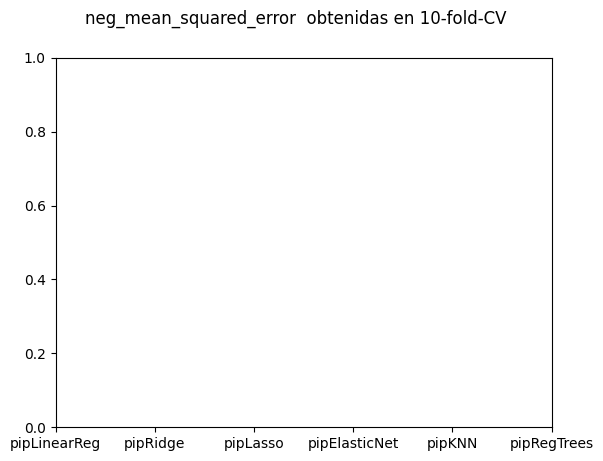

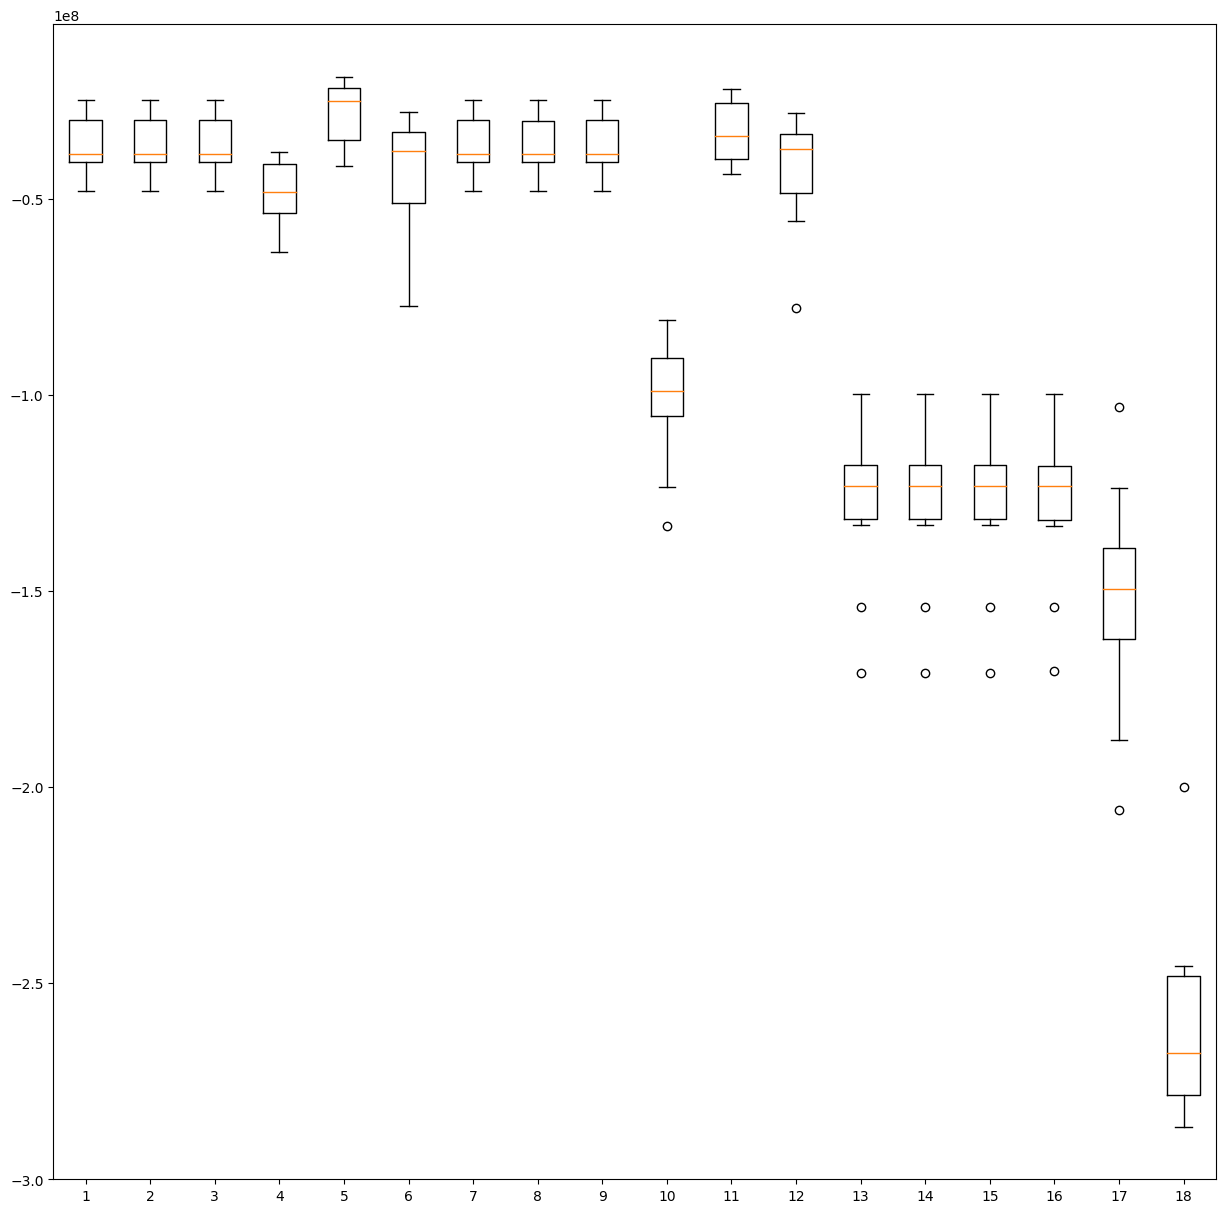

In [87]:
# Muestra graficamente los resultados (boxplots) de neg_mean_squared_error  en crossvalidacion de los pipelines evaluados

fig = plt.figure()
plt.figure(figsize=(15,15))
fig.suptitle('neg_mean_squared_error  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
#completar

pipeline con mejor promedio de la metrica:  pipLasso
mejor metrica promedio:  -36705685.09963353
Mean squared error: 28096063.33169772
Mean absolute error: 3078.3594341417916
Explained variance score: 0.8249724922787237
R2 score: 0.8243818006020394


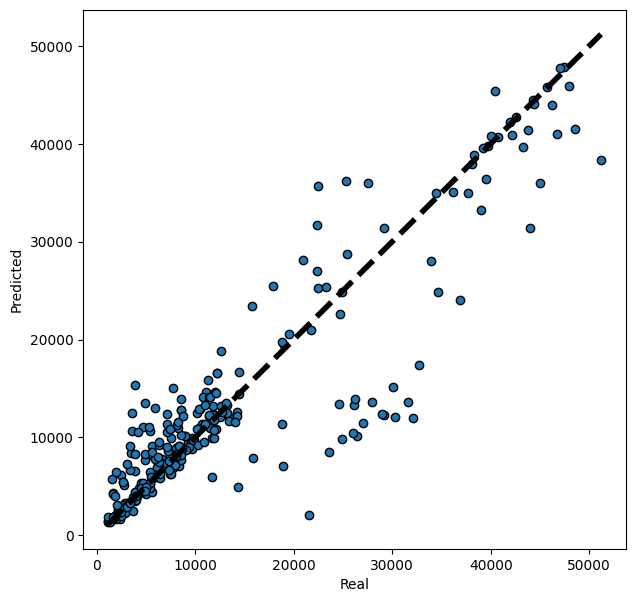

In [80]:
# Escoja el mejor pipeline y reentrenelo  con con todos los datos de entrenamiento y lo prueba en el conjunto de validación
import numpy as np
ind = 0
best_metric = -999999999
best_ind = 0
for result in results:
    current_metric = np.mean(results[ind])
    if current_metric > best_metric :
        #complete la logica
        best_ind= ind
        best_metric=current_metric
    ind += 1
print('pipeline con mejor promedio de la metrica: ', names[best_ind])
print('mejor metrica promedio: ', best_metric)

pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())
pipeline.fit(x_train, y_train)

# predice el target en el conjunto de validacion
y_predicted = pipeline.predict(x_test)


# muestra metricas de las predicciones en el conjunto de validacion

print("Mean squared error:", mean_squared_error(y_test, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_test, y_predicted))
print("Explained variance score:", explained_variance_score(y_test, y_predicted))
print("R2 score:", r2_score(y_test, y_predicted))

# Muestra scatter plot de los valores reales vs los predichos en el conjunto de validacion

fig, ax = plt.subplots(figsize=[7,7])
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()


In [64]:
# Note que el resultado del ajuste es un Pipeline
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

**COMPARE LOS RESULTADOS DE PIPELINES vs MODELOS SIMPLES**

Podemos notar que en un modelo simple el mejor modelo es el Lasso, pero notamos que eso cambia cuando se utiliza un pipeline, especificamente usando el pipeline con StandardScaler y usando el modelo KNN que nos da una metrica mejor a la de solo utilizar el modelo Lasso.

Notamos esta diferencia en el scatter plot, donde al usar el pipeline podemos obtener predicciones mucho más cercanas al valor real en comparacion con el modelo simple Lasso.